In [1]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
import numpy as np
from sklearn import linear_model

In [2]:
import os 
os.chdir('E:/Capstone Project')
df = pd.read_excel('Sales_Forecast_Data_Project.xlsx')

In [3]:
df.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59


In [4]:
df.describe()

,VALUE
count,230152.000000
mean,704.973592
std,2261.623760
min,0.000000
25%,0.000000
50%,0.000000
75%,269.865000
max,69828.750000


In [5]:
df.nunique()

FIN_YEAR        4
MONTH          12
STATE           5
FG              4
DISTRICT      142
COMPANY        47
VALUE       25507
dtype: int64

In [6]:
df.isnull().sum()

FIN_YEAR    0
MONTH       0
STATE       0
FG          0
DISTRICT    0
COMPANY     0
VALUE       0
dtype: int64

In [12]:
df.dtypes

FIN_YEAR     object
MONTH        object
STATE        object
FG           object
DISTRICT     object
COMPANY      object
VALUE       float64
dtype: object

In [7]:
df1= df[df['COMPANY']==('ABC Manufacturing')]

In [8]:
df1.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110


In [9]:
lst_months=['Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df1 = df1[df1["MONTH"].isin(lst_months)]

In [10]:
df1.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110


In [11]:
df1['Year-Month']= df['MONTH'] + df['FIN_YEAR'].str[:4]

In [12]:
df2=df[df['COMPANY'] == 'ABC Manufacturing']

In [13]:
lst_months_sec=['Jan','Feb','Mar']
df2 = df2[df2["MONTH"].isin(lst_months_sec)]

In [14]:
df2['Year-Month']= df2['MONTH'] + df2['FIN_YEAR'].str[5:]

In [15]:
new_df = pd.concat([df1, df2])

In [16]:
new_df

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Year-Month
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,Dec2014
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,Dec2014
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,Dec2014
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,Dec2014
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,Dec2014
...,...,...,...,...,...,...,...,...
230086,2016-2017,Feb,Punjab,Bactericides,Tarn Taran,ABC Manufacturing,0.000,Feb2017
230087,2016-2017,Feb,Punjab,Bactericides,Rupnagar,ABC Manufacturing,0.000,Feb2017
230088,2016-2017,Feb,Punjab,Bactericides,S.A.S Nagar,ABC Manufacturing,0.000,Feb2017
230089,2016-2017,Feb,Punjab,Bactericides,Sangrur,ABC Manufacturing,0.000,Feb2017


In [17]:
new_df['Year-Month']= pd.to_datetime(new_df['Year-Month'],infer_datetime_format=True)

In [18]:
new_df.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Year-Month
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,2014-12-01
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,2014-12-01
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,2014-12-01
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,2014-12-01
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,2014-12-01


In [19]:
X= new_df.VALUE
result = adfuller(X)

In [20]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.136218
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


The p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary.

In [21]:
new_df = new_df.sort_values('Year-Month')
new_df

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Year-Month
119264,2014-2015,Apr,Uttar Pradesh,Rodenticides,Kanpur Dehat,ABC Manufacturing,25.650,2014-04-01
118547,2014-2015,Apr,Uttar Pradesh,Rodenticides,Gautam Buddha Nagar,ABC Manufacturing,0.000,2014-04-01
118546,2014-2015,Apr,Uttar Pradesh,Rodenticides,Ghaziabad,ABC Manufacturing,190.485,2014-04-01
118545,2014-2015,Apr,Uttar Pradesh,Rodenticides,Baghpat,ABC Manufacturing,82.080,2014-04-01
118544,2014-2015,Apr,Uttar Pradesh,Rodenticides,Meerut,ABC Manufacturing,85.995,2014-04-01
...,...,...,...,...,...,...,...,...
51514,2017-2018,Jan,Uttar Pradesh,Insecticides,Unnao,ABC Manufacturing,24476.850,2018-01-01
51515,2017-2018,Jan,Uttar Pradesh,Insecticides,Lucknow,ABC Manufacturing,8613.000,2018-01-01
51516,2017-2018,Jan,Uttar Pradesh,Insecticides,Rae Bareli,ABC Manufacturing,15958.890,2018-01-01
51510,2017-2018,Jan,Uttar Pradesh,Insecticides,Shahjahanpur,ABC Manufacturing,19044.450,2018-01-01


<AxesSubplot:xlabel='STATE', ylabel='count'>

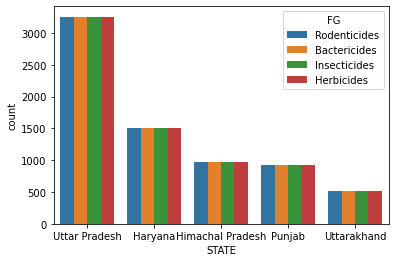

In [22]:
sns.countplot(x='STATE', hue='FG', data = new_df)

In [23]:
new_df.drop(['FIN_YEAR','MONTH','FG','DISTRICT','COMPANY'],axis=1,inplace =True)
new_df

,STATE,VALUE,Year-Month
119264,Uttar Pradesh,25.650,2014-04-01
118547,Uttar Pradesh,0.000,2014-04-01
118546,Uttar Pradesh,190.485,2014-04-01
118545,Uttar Pradesh,82.080,2014-04-01
118544,Uttar Pradesh,85.995,2014-04-01
...,...,...,...
51514,Uttar Pradesh,24476.850,2018-01-01
51515,Uttar Pradesh,8613.000,2018-01-01
51516,Uttar Pradesh,15958.890,2018-01-01
51510,Uttar Pradesh,19044.450,2018-01-01


# Data Visualization

<AxesSubplot:xlabel='STATE', ylabel='count'>

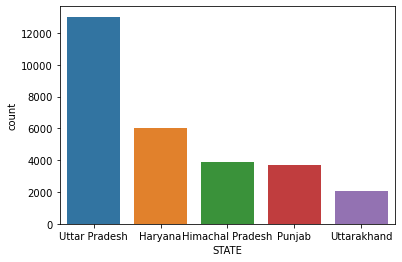

In [35]:
sns.countplot(x='STATE', data= new_df)

In [36]:
new_df['STATE'].value_counts(dropna= False)

Uttar Pradesh       13024
Haryana              6028
Himachal Pradesh     3880
Punjab               3668
Uttarakhand          2040
Name: STATE, dtype: int64

<AxesSubplot:xlabel='STATE', ylabel='VALUE'>

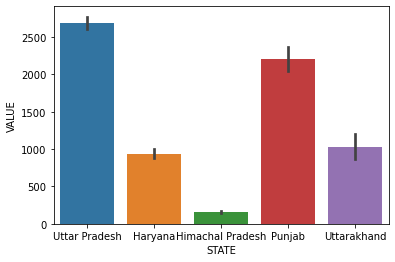

In [37]:
sns.barplot(x='STATE',y='VALUE',data= new_df)

In [38]:
new_df.isnull().sum()

STATE         0
VALUE         0
Year-Month    0
dtype: int64

In [39]:
HR=new_df[new_df['STATE'] == ('Haryana')]

UP= new_df[new_df['STATE']==('Uttar Pradesh')]

PJ= new_df[new_df['STATE']==('Punjab')]

UK= new_df[new_df['STATE']==('Uttarakhand')]

HP= new_df[new_df['STATE']==('Himachal Pradesh')]

In [40]:
HR.head()

,STATE,VALUE,Year-Month
175640,Haryana,0.0,2014-04-01
175641,Haryana,0.0,2014-04-01
175642,Haryana,0.0,2014-04-01
175643,Haryana,0.0,2014-04-01
175644,Haryana,0.0,2014-04-01


In [41]:
HR=HR.groupby('Year-Month')['VALUE'].sum().reset_index()

UP=UP.groupby('Year-Month')['VALUE'].sum().reset_index()

PJ=PJ.groupby('Year-Month')['VALUE'].sum().reset_index()

UK=UK.groupby('Year-Month')['VALUE'].sum().reset_index()

HP=HP.groupby('Year-Month')['VALUE'].sum().reset_index()

In [42]:
HR.head()

,Year-Month,VALUE
0,2014-04-01,32577.660
1,2014-05-01,47482.740
2,2014-06-01,130684.185
3,2014-07-01,75471.075
4,2014-08-01,107146.530


In [43]:
HR=  HR.set_index('Year-Month')

UP=  UP.set_index('Year-Month')

PJ=  PJ.set_index('Year-Month')

UK=  UK.set_index('Year-Month')

HP=  HP.set_index('Year-Month')

In [44]:
y= UP['VALUE'].resample('MS').mean()

y1= HR['VALUE'].resample('MS').mean()

y2= PJ['VALUE'].resample('MS').mean()

y3= UK['VALUE'].resample('MS').mean()

y4= HP['VALUE'].resample('MS').mean()

In [45]:
y.tail()

Year-Month
2017-09-01     539775.090
2017-10-01     720295.875
2017-11-01    1234663.965
2017-12-01     991006.515
2018-01-01     734645.700
Freq: MS, Name: VALUE, dtype: float64

# Spliting Test and Train data for all the states

In [46]:
#Split data for UP
train_len = 32
train = y[0:train_len]
test = y[train_len:]

In [47]:
#Split data for HR
train_len1 = 32
train1 = y1[0:train_len1]
test1 = y1[train_len1:]

In [48]:
#Split data for PJ
train_len2 = 32
train2 = y2[0:train_len2]
test2 = y2[train_len2:]

In [49]:
#Split data for UK
train_len3 = 32
train3 = y3[0:train_len3]
test3 = y3[train_len3:]

In [51]:
#Split data for HP
train_len4 = 32
train4 = y4[0:train_len4]
test4 = y4[train_len4:]

# Applying ARIMA Model on Uttar Pradesh state

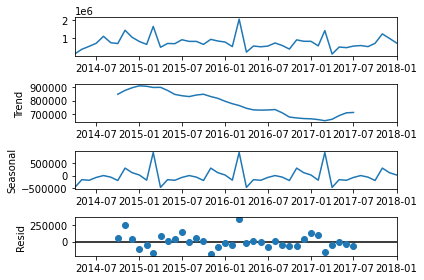

In [127]:
decomposition=sm.tsa.seasonal_decompose(UP,model='additive')
fig=decomposition.plot()
plt.show()

In [128]:
len(UP)

46

In [129]:
print('train data',len(train))
print('test data',len(test))

train data 32
test data 14


In [130]:
from statsmodels.tsa.arima.model import ARIMA
import warnings 
warnings.filterwarnings('ignore')

In [131]:
#Assuming 5,0,4 as the value of p,d,q 

In [132]:
model=ARIMA(train,order=(5,0,4)).fit() 

In [133]:
len(train),(len(y)-1)

(32, 45)

In [134]:
pred=model.predict(start=len(train),end=(len(y)-1))

In [135]:
pred.tail()

2017-09-01    883256.769446
2017-10-01    655049.274478
2017-11-01    898304.030686
2017-12-01    691759.001448
2018-01-01    888200.895516
Freq: MS, Name: predicted_mean, dtype: float64

In [136]:
error=np.sqrt(mean_squared_error(test,pred))
error

294699.77675451664

In [137]:
test.mean(),np.sqrt(test.var())

(726771.3717857143, 325369.9818881314)

<AxesSubplot:xlabel='Year-Month'>

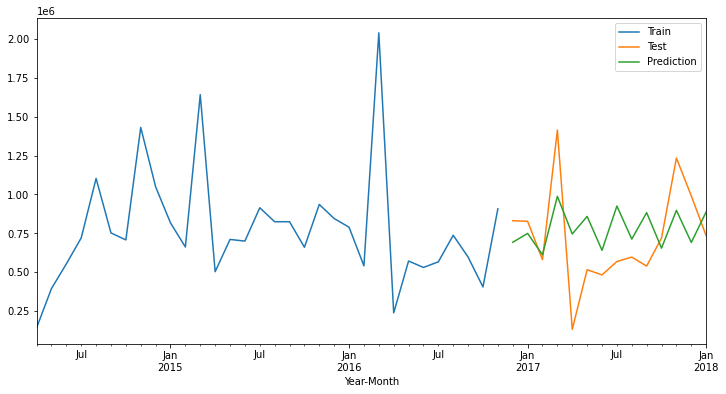

In [145]:
train.plot(legend=True,label='Train',figsize=(12,6))
test.plot(legend=True,label='Test')
pred.plot(legend=True,label='Prediction')

In [146]:
final_model=ARIMA(y,order=(5,0,4)).fit() 

In [147]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  VALUE   No. Observations:                   46
Model:                 ARIMA(5, 0, 4)   Log Likelihood                -647.046
Date:                Sat, 19 Nov 2022   AIC                           1316.092
Time:                        13:35:20   BIC                           1336.207
Sample:                    04-01-2014   HQIC                          1323.628
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.61e+05   7.87e+04      9.669      0.000    6.07e+05    9.15e+05
ar.L1         -0.7058      1.725     -0.409      0.682      -4.088       2.676
ar.L2         -0.5121      1.316     -0.389      0.697      -3.092       2.067
ar.L3         -0.5417      1.296     -0.418      0.676      -3.082       1.999
ar.L4          0.4261      1.331      0.320      0.749      -2.182       3.034
ar.L5          0.1665      0.511      0.326      0.744      -0.835       1.168
ma.L1          0.6252      1.935      0.323      0.747      -3.167       4.418
ma.L2          0.6830      1.263      0.541      0.589      -1.793       3.159
ma.L3          0.8187      1.480      0.553      0.580      -2.083       3.720
ma.L4         -0.1796      1.686     -0.107      0.915      -3.483       3.124
sigma2      9.442e+10      0.002   4.27e+13      0.000    9.44e+10    9.44e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.30
Prob(Q):                              0.90   Prob(JB):                         0.19
Heteroskedasticity (H):               0.67   Skew:                             0.53
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.24e+32. Standard errors may be unstable.
"""

In [148]:
prediction=final_model.predict(start=len(y),end=(len(y)+6))
prediction

2018-02-01    7.091206e+05
2018-03-01    1.047530e+06
2018-04-01    6.923973e+05
2018-05-01    7.246994e+05
2018-06-01    6.399808e+05
2018-07-01    1.015550e+06
2018-08-01    6.813893e+05
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Year-Month'>

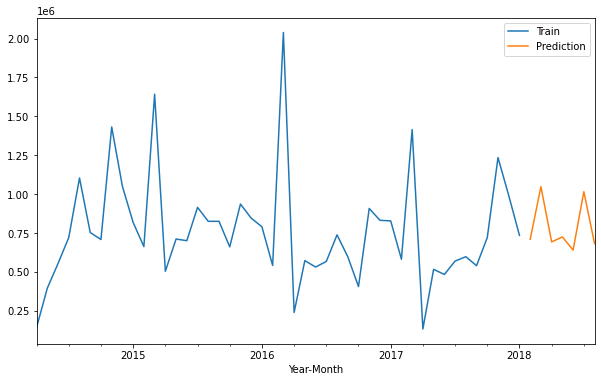

In [149]:
y.plot(legend=True,label='Train',figsize=(10,6))
prediction.plot(legend=True,label='Prediction')

In [150]:
import itertools

In [151]:
p=range(0,8) #for AR
q=range(0,8) #for MA
d=range(0,2) #Generally not required more than 3 difference 0,1 & 2

In [152]:
pdq_combination=list(itertools.product(p,d,q))

In [153]:
len(pdq_combination)

128

In [154]:
rmse=[]
order1=[]

In [155]:
 for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(y)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
        
    except:
        continue

In [156]:
results=pd.DataFrame(index=order,data=rmse,columns=['RMSE'])
results.head()

,RMSE
"(0, 0, 0)",317365.181228
"(0, 0, 1)",317511.209411
"(0, 0, 2)",317766.618472
"(0, 0, 3)",319942.240046
"(0, 0, 4)",312148.307158


In [157]:
results_sort=results.sort_values('RMSE')

In [158]:
results_sort.head()

,RMSE
"(2, 0, 7)",248379.313516
"(1, 0, 7)",251022.828906
"(0, 0, 7)",253689.773351
"(3, 0, 7)",263453.676373
"(4, 0, 3)",265998.070651


In [159]:
model=ARIMA(train,order=(2,0,7)).fit() ## assuming p-2,q-0,d-7
model

In [160]:
import warnings
warnings.filterwarnings('ignore')

In [283]:
pred3=model.predict(start=len(train),end=(len(y)-1))
pred3.head()

2016-12-01    6.951826e+05
2017-01-01    9.881884e+05
2017-02-01    7.381164e+05
2017-03-01    1.129617e+06
2017-04-01    6.437094e+05
Freq: MS, Name: predicted_mean, dtype: float64

In [284]:
pred3.tail()

2017-09-01    789587.358123
2017-10-01    759763.392994
2017-11-01    784817.619158
2017-12-01    768274.575244
2018-01-01    780915.500261
Freq: MS, Name: predicted_mean, dtype: float64

In [285]:
from sklearn.metrics import mean_squared_error
error.sqrt(mean_squared_error(test, pred))
error

248379.31351601452

<AxesSubplot:xlabel='Year-Month'>

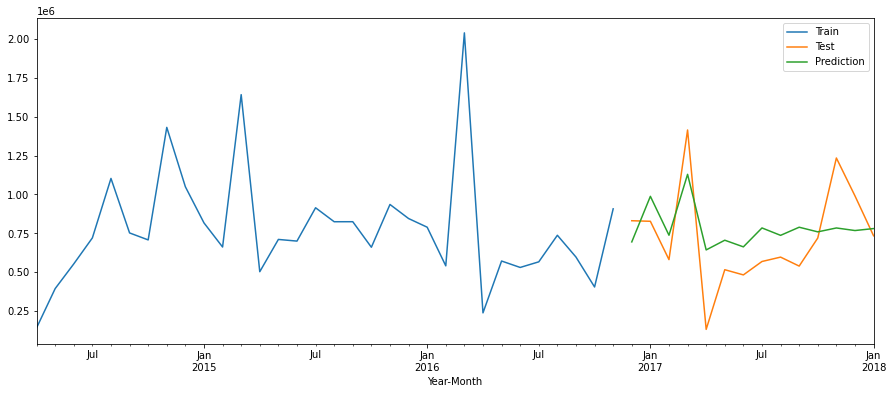

In [286]:
train.plot(legend=True,label='Train',figsize=(15,6))
test.plot(legend=True,label='Test')
pred.plot(legend=True,label='Prediction')

# Applying ARIMA Model on Haryana state

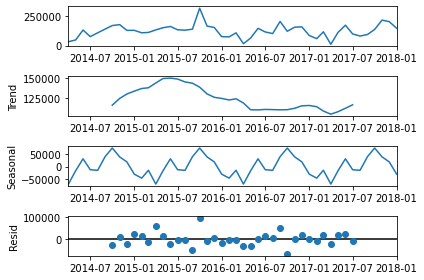

In [311]:
decomposition=sm.tsa.seasonal_decompose(HR,model='additive')
fig=decomposition.plot()
plt.show()

In [312]:
print('train data',len(train1))
print('test data',len(test1))

train data 32
test data 14


In [313]:
#Assuming 5,0,4 as p,d,q
modelhr=ARIMA(train1,order=(5,0,4)).fit() 

In [314]:
len(train1),(len(y1)-1)

(32, 45)

In [315]:
predhr=model.predict(start=len(train1),end=(len(y1)-1))

In [316]:
predhr.tail()

2017-09-01    129519.298650
2017-10-01    153522.873989
2017-11-01    123950.384689
2017-12-01     82823.983245
2018-01-01     85886.912187
Freq: MS, Name: predicted_mean, dtype: float64

In [317]:
errorhr=np.sqrt(mean_squared_error(test1,predhr))
errorhr

62324.861971769504

<AxesSubplot:xlabel='Year-Month'>

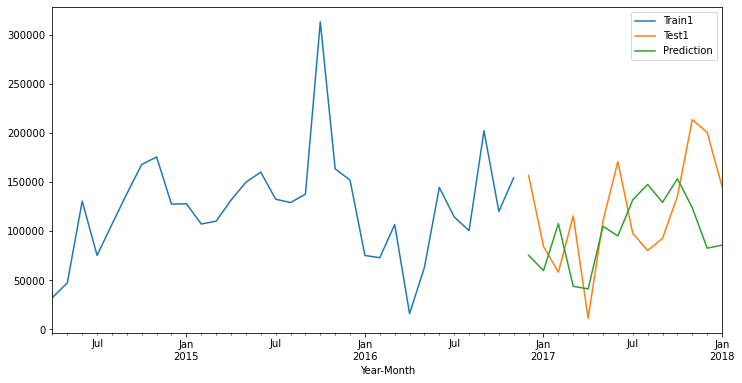

In [318]:
train1.plot(legend=True,label='Train1',figsize=(12,6))
test1.plot(legend=True,label='Test1')
predhr.plot(legend=True,label='Prediction')

In [319]:
#our assumption for p ,d and q seems wrong

In [320]:
final_modelhr=ARIMA(y,order=(5,0,4)).fit() 

In [321]:
final_modelhr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  VALUE   No. Observations:                   46
Model:                 ARIMA(5, 0, 4)   Log Likelihood                -647.046
Date:                Fri, 18 Nov 2022   AIC                           1316.092
Time:                        19:18:42   BIC                           1336.207
Sample:                    04-01-2014   HQIC                          1323.628
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.61e+05   7.87e+04      9.669      0.000    6.07e+05    9.15e+05
ar.L1         -0.7058      1.725     -0.409      0.682      -4.088       2.676
ar.L2         -0.5121      1.316     -0.389      0.697      -3.092       2.067
ar.L3         -0.5417      1.296     -0.418      0.676      -3.082       1.999
ar.L4          0.4261      1.331      0.320      0.749      -2.182       3.034
ar.L5          0.1665      0.511      0.326      0.744      -0.835       1.168
ma.L1          0.6252      1.935      0.323      0.747      -3.167       4.418
ma.L2          0.6830      1.263      0.541      0.589      -1.793       3.159
ma.L3          0.8187      1.480      0.553      0.580      -2.083       3.720
ma.L4         -0.1796      1.686     -0.107      0.915      -3.483       3.124
sigma2      9.442e+10      0.002   4.27e+13      0.000    9.44e+10    9.44e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.30
Prob(Q):                              0.90   Prob(JB):                         0.19
Heteroskedasticity (H):               0.67   Skew:                             0.53
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.24e+32. Standard errors may be unstable.
"""

In [322]:
predictionhr=final_modelhr.predict(start=len(y1),end=(len(y1)+6))
predictionhr

2018-02-01    7.091206e+05
2018-03-01    1.047530e+06
2018-04-01    6.923973e+05
2018-05-01    7.246994e+05
2018-06-01    6.399808e+05
2018-07-01    1.015550e+06
2018-08-01    6.813893e+05
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Year-Month'>

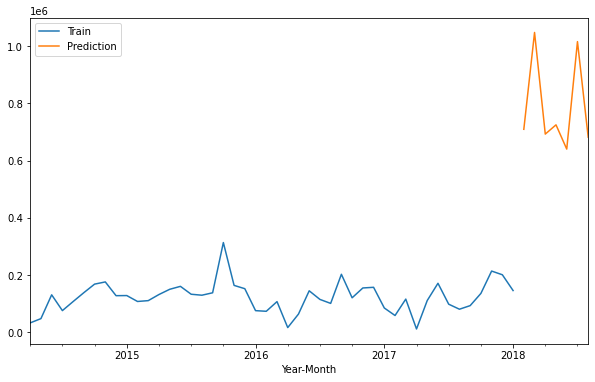

In [323]:
y1.plot(legend=True,label='Train',figsize=(10,6))
predictionhr.plot(legend=True,label='Prediction')

In [324]:
import itertools
p=range(0,8) #for AR
q=range(0,8) #for MA
d=range(0,2) #Generally not required more than 3 difference 0,1 & 2

In [325]:
pdq_combination=list(itertools.product(p,d,q))

In [326]:
len(pdq_combination)

128

In [330]:
rmsehr=[]
orderhr=[]

In [329]:
 for pdq in pdq_combination:
    try:
        modelhr=ARIMA(train1,order=pdq).fit()
        predhr=modelhr.predict(start=len(train1),end=(len(y1)-1))
        errorhr=np.sqrt(mean_squared_error(test1,predhr))
        orderhr.append(pdq)
        rmsehr.append(errorhr)
        
    except:
        continue

In [328]:
resultshr=pd.DataFrame(index=orderhr,data=rmsehr,columns=['RMSE'])
resultshr.head()

,RMSE
"(0, 0, 0)",466173.536635
"(0, 0, 1)",466173.536635
"(0, 0, 2)",466173.536635
"(0, 0, 3)",466173.536635
"(0, 0, 4)",466173.536635


In [310]:
resultshr_sort=resultshr.sort_values('RMSE')
resultshr_sort.head()

,RMSE
"(0, 0, 0)",466173.536635
"(5, 1, 3)",466173.536635
"(5, 1, 2)",466173.536635
"(5, 1, 1)",466173.536635
"(5, 1, 0)",466173.536635
